<a href="https://colab.research.google.com/github/SudheenaMisra/githubCE888/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv')
data.head()

,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5.1,-6.75,-7.18,8.45,-7.18.1,-7.52.1,-7.43,-9.81,-9.85.1,-9.85.2,-9.37,1.5,-4.37,-9.81.1,-8.5.2,1.12,7.82,2.86,9.13,-7.43.1,2.14,-4.08,-9.08,7.82.1,5.05,4.95,-9.17,-8.4,-8.4.1,...,8.59,3.59,-6.84,-9.03.1,2.82.1,-1.36,-9.08.2,8.3.1,5.68,-4.81,99,99.1,99.2,99.3,99.4,99.5,99.6,-9.42.1,99.7,99.8,99.9,-7.72,99.10,99.11,99.12,99.13,99.14,99.15,99.16,99.17,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
2,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,-6.80,-5.73,-5.00,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.60,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,...,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5.0,-4.42,-7.28,-6.50,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24982 entries, 0 to 24981
Columns: 101 entries, 74 to 99.25
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [6]:
data.isnull().sum()

74       0
-7.82    0
8.79     0
-9.66    0
-8.16    0
        ..
99.22    0
-5.63    0
99.23    0
99.24    0
99.25    0
Length: 101, dtype: int64

In [10]:
#Its given that the value "99" corresponds to not rated entries.
train_data = data.replace(99, np.NaN)
train_data

,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5.1,-6.75,-7.18,8.45,-7.18.1,-7.52.1,-7.43,-9.81,-9.85.1,-9.85.2,-9.37,1.5,-4.37,-9.81.1,-8.5.2,1.12,7.82,2.86,9.13,-7.43.1,2.14,-4.08,-9.08,7.82.1,5.05,4.95,-9.17,-8.4,-8.4.1,...,8.59,3.59,-6.84,-9.03.1,2.82.1,-1.36,-9.08.2,8.3.1,5.68,-4.81,99,99.1,99.2,99.3,99.4,99.5,99.6,-9.42.1,99.7,99.8,99.9,-7.72,99.10,99.11,99.12,99.13,99.14,99.15,99.16,99.17,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
2,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
3,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100.0,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,-6.80,-5.73,-5.00,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.60,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,...,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5.00,-4.42,-7.28,-6.50,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24977,100.0,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24978,91.0,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24979,39.0,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,Na

In [11]:
#Counting the null values
train_data.isnull().sum()

74          81
-7.82     8531
8.79      6799
-9.66     8341
-8.16     9375
         ...  
99.22    14612
-5.63    14463
99.23    14316
99.24    14072
99.25    15039
Length: 101, dtype: int64

In [15]:
#dropping the first column
train_data = train_data.drop(train_data.columns[0], axis = 1)
train_data.head()

,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5.1,-6.75,-7.18,8.45,-7.18.1,-7.52.1,-7.43,-9.81,-9.85.1,-9.85.2,-9.37,1.5,-4.37,-9.81.1,-8.5.2,1.12,7.82,2.86,9.13,-7.43.1,2.14,-4.08,-9.08,7.82.1,5.05,4.95,-9.17,-8.4,-8.4.1,-8.4.2,...,8.59,3.59,-6.84,-9.03.1,2.82.1,-1.36,-9.08.2,8.3.1,5.68,-4.81,99,99.1,99.2,99.3,99.4,99.5,99.6,-9.42.1,99.7,99.8,99.9,-7.72,99.10,99.11,99.12,99.13,99.14,99.15,99.16,99.17,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
3,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,-6.80,-5.73,-5.00,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.60,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,-7.04,...,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5.0,-4.42,-7.28,-6.50,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


In [16]:
arr = train_data.values
print(arr.shape)

(24982, 100)


In [17]:
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

2498200 (2498200,)


In [18]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [20]:
new_arr, idx = replace(arr, 0.1)
arr[idx[0][0], idx[1][0]]

-3.16

In [21]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [22]:
n_latent_factors = 2
user_ratings = train_data.values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [23]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 2) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history    

In [26]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations


Iteration 0/10:	MSE=22.286965
Iteration 2/10:	MSE=21.916350
Iteration 4/10:	MSE=21.587794
Iteration 6/10:	MSE=21.297369
Iteration 8/10:	MSE=21.035565


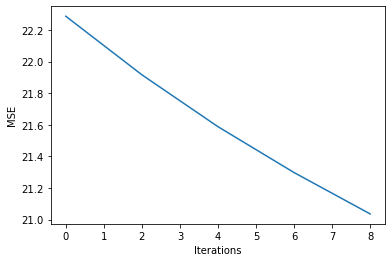

In [27]:
plt.figure()
plt.plot(np.arange(0, num_iter, 2), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [28]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[1.37523122, 1.27338106, 1.21618967, ..., 1.66016406, 1.07516151,
        1.95344632],
       [4.19220158, 3.99429738, 3.89919806, ..., 5.09802312, 3.33221988,
        5.98206182],
       [2.49576336, 2.28372822, 2.16079257, ..., 3.00386003, 1.93797295,
        3.53852135],
       ...,
       [0.84263193, 0.7528666 , 0.69856547, ..., 1.00816436, 0.64546924,
        1.19029269],
       [1.48889875, 1.47918995, 1.48805665, ..., 1.8306514 , 1.21292537,
        2.13924903],
       [2.51717969, 2.22460274, 2.04519855, ..., 3.00359188, 1.91632333,
        3.54982835]])

In [30]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = train_data.columns

In [31]:
comparison_data

,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,-8.5.1,-6.75,-7.18,8.45,-7.18.1,-7.52.1,-7.43,-9.81,-9.85.1,-9.85.2,-9.37,1.5,-4.37,-9.81.1,-8.5.2,1.12,7.82,2.86,9.13,-7.43.1,2.14,-4.08,-9.08,7.82.1,5.05,4.95,-9.17,-8.4,-8.4.1,-8.4.2,...,8.59,3.59,-6.84,-9.03.1,2.82.1,-1.36,-9.08.2,8.3.1,5.68,-4.81,99,99.1,99.2,99.3,99.4,99.5,99.6,-9.42.1,99.7,99.8,99.9,-7.72,99.10,99.11,99.12,99.13,99.14,99.15,99.16,99.17,2.82.2,99.18,99.19,99.20,99.21,99.22,-5.63,99.23,99.24,99.25
0,"(4.08, 1.3752312160638165)","(-0.29, 1.2733810632605418)","(6.36, 1.2161896668329182)","(4.37, 0.3603090811925322)","(-2.38, 1.071707472309817)","(-9.66, 2.1868910491126274)","(-0.73, 0.49258395160979673)","(-5.34, 0.0630648558776469)","(8.88, 0.7016988396834715)","(9.22, 1.567787084400653)","(6.75, 2.185411075408235)","(8.64, 2.2328909107764097)","(4.42, -0.4739448648286429)","(7.43, 2.22078397227958)","(4.56, -0.6500278199426222)","(-0.97, -1.4059488431949037)","(4.66, 0.03136138790863068)","(-0.68, 0.21242739635126445)","(3.3, 0.9609773461763063)","(-1.21, 0.40640672096249375)","(0.87, 2.518848015375434)","(8.64, 1.7271485963148385)","(8.35, 1.186286916488341)","(9.17, 0.05024244420907517)","(0.05, 1.5170703157856233)","(7.57, 2.143526188981715)","(4.71, 2.87228765417723)","(0.87, 2.106756264129322)","(-0.39, 2.72716507710843)","(6.99, 1.050593942399743)","(6.5, 2.5064516400389407)","(-0.92, 2.8578349803626466)","(7.14, 0.40621434593554234)","(9.03, 1.852630209005882)","(-1.8, 2.8269980182889687)","(0.73, 2.811838702077354)","(7.09, 0.15042527851638351)","(3.4, 1.7907343422703654)","(-0.87, 1.995595350112194)","(7.91, 1.825295689874901)",...,"(-6.7, 2.6729994071102063)","(-3.35, 2.819774814270537)","(-9.03, 1.366243480694811)","(4.47, 0.6002770435891773)","(4.08, 2.5508538667548932)","(-3.83, 2.61370715044178)","(8.74, 0.5714269039326392)","(1.12, 2.6116471622867263)","(0.78, 2.683302925920647)","(7.52, 1.5183482358150941)","(-5.0, 0.6384097694760377)","(2.77, 2.6193619595689968)","(8.3, 1.8611834060691326)","(7.77, 0.28915061539183856)","(7.33, 0.9276100123293279)","(6.21, 2.3916410208416483)","(7.72, 1.576707664829995)","(8.98, 2.156155303635474)","(8.64, 1.3583797549204368)","(8.2, 2.001492123710795)","(3.93, 2.114535186559717)","(4.85, 1.59122409754229)","(4.85, 2.27356042960012)","(6.07, 1.5393066234116985)","(8.98, 1.7314474763969987)","(4.51, 1.0310792005161553)","(-0.05, 2.050846111568195)","(3.69, 2.1214121722341575)","(4.56, 2.851240405356745)","(0.58, 1.4704075321397505)","(2.82, 2.0378409679183274)","(-4.95, 1.7599107772897717)","(-0.29, 2.3882762657468604)","(7.86, 1.545273501760023)","(-0.19, 1.5031723033341207)","(-2.14, 1.8317275513172087)","(3.06, 1.8534667980780266)","(0.34, 1.6601640642174396)","(-4.32, 1.0751615064106295)","(1.07, 1.9534463207474053)"
1,"(nan, 4.192201584672591)","(nan, 3.994297384799516)","(nan, 3.8991980643713786)","(nan, 1.4227729244313603)","(9.03, 3.208216405257092)","(9.27, 6.601653605254904)","(9.03, 1.4239669885084838)","(9.27, 0.3102705726348662)","(nan, 2.3835074848518287)","(nan, 4.84160845593416)","(7.33, 6.554567433675355)","(7.57, 6.745507837191954)","(9.37, -1.1598414839109732)","(6.17, 6.668314563168306)","(-6.36, -1.8642444385550254)","(-6.89, -3.9701426223230576)","(-7.86, 0.19953030970163393)","(9.03, 0.7251319896209444)","(9.03, 2.9212816864092463)","(9.03, 1.28689882369592)","(7.28, 7.49690641833575)","(nan, 5.326551732637377)","(8.25, 3.7840455208018873)","(nan, 0.49695236668136306)","(nan, 4.713729744033147)","(7.48, 6.430898251684307)","(7.28, 8.45769908059889)","(7.28, 6.361991849743543)","(8.93, 8.013423859729679)","(nan, 3.38700055937931)","(6.17, 7.409626107004224)","(7.28, 8.437695068008896)","(nan, 1.5630837027304445)","(nan, 5.605846002909464)","(8.98, 8.303372064257232)","(7.33, 8.294720050665854)","(nan, 0.7055129484480743)","(6.17, 5.455489912649932)","(9.08, 6.074472469995997)","(7.33, 5.560358623281721)",...,"(6.46, 7.937001400066492)","(7.28, 8.400634047419182)","(nan, 4.29959

In [ ]:
lab quiz

In [34]:
movies_data = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx", sheet_name="Items")
movies_data.head()

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566


In [35]:
movies_data['Title'].unique()

array(['Star Wars: Episode IV - A New Hope (1977)', 'Finding Nemo (2003)',
       'Forrest Gump (1994)', 'American Beauty (1999)',
       'Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
       'Kill Bill: Vol. 1 (2003)',
       'Eternal Sunshine of the Spotless Mind (2004)',
       'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 'Memento (2000)',
       'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
       'Gladiator (2000)', 'Back to the Future (1985)', 'Snatch (2000)',
       'Pretty Woman (1990)',
       'The Lord of the Rings: The Fellowship of the Ring (2001)',
       'The Lord of the Rings: The Two Towers (2002)',
       'The Lord of the Rings: The Return of the King (2003)',
       'O Brother Where Art Thou? (2000)', 'Donnie Darko (2001)',
       'Crouching Tiger Hidden Dragon (Wo hu cang long) (2000)',
       'Lost in Translation (2003)', 'The Dark Knight (2008)',
       "Ocean's Eleven (2001)", 'Minority Report (2002)',
       '